In [1]:
import sys
sys.path.append('./test')

import pylab as pl
import numpy as np
import xarray as xr

import rhkpy

# Loading dI/dV map

In [2]:
filename_map = './test/dI-dV_ABC_Graphite-Sample5_9K_2021_08_24_11_54_33_632.sm4'
specmap = rhkpy.rhkdata(filename_map)

There are two xarray Datasets in the file: `image` and `spectra`.
One can access these using the dot `.` notation

In [3]:
specmap.image

<xarray.Dataset>
Dimensions:     (x: 512, y: 512, scandir: 2)
Coordinates:
  * x           (x) float64 -563.6 -563.4 -563.2 -563.0 ... -464.2 -464.0 -463.8
  * y           (y) float64 -828.9 -828.7 -828.5 -828.3 ... -729.5 -729.3 -729.1
  * scandir     (scandir) <U8 'forward' 'backward'
Data variables:
    topography  (x, y, scandir) float64 0.2228 0.5587 0.3199 ... 1.126 1.268
    current     (x, y, scandir) float64 105.2 95.93 108.6 ... 99.23 92.91 96.35
    lia         (x, y, scandir) float64 -0.05732 -0.1006 ... -0.09234 -0.1453
Attributes:
    filename:          ./test/dI-dV_ABC_Graphite-Sample5_9K_2021_08_24_11_54_...
    xoffset:           -563.5723326555265
    yoffset:           -828.9023483917802
    xoffset_units:     nm
    yoffset_units:     nm
    bias:              0.5
    bias units:        V
    setpoint:          100.0000013351432
    setpoint units:    pA
    measurement date:  08/23/21
    measurement time:  19:46:50
    scan angle:        0.0

Both the `spectra` and `image` have attributes, which can be accessed like so:

In [4]:
specmap.image.attrs

{'filename': './test/dI-dV_ABC_Graphite-Sample5_9K_2021_08_24_11_54_33_632.sm4',
 'xoffset': -563.5723326555265,
 'yoffset': -828.9023483917802,
 'xoffset_units': 'nm',
 'yoffset_units': 'nm',
 'bias': 0.5,
 'bias units': 'V',
 'setpoint': 100.0000013351432,
 'setpoint units': 'pA',
 'measurement date': '08/23/21',
 'measurement time': '19:46:50',
 'scan angle': 0.0}

`image` has data variables: 'topography', 'current' and 'lia'. It has coordinates: 'x', 'y', 'scandir'

Plotting the topography data, we select the `forward` scan direction. This can be done using the `isel` function

In [5]:
fwscan = specmap.image.sel(scandir = 'forward')

Now we can see that the coordinate `scandir` is gone, leaving only `x` and `y`

In [6]:
fwscan

<xarray.Dataset>
Dimensions:     (x: 512, y: 512)
Coordinates:
  * x           (x) float64 -563.6 -563.4 -563.2 -563.0 ... -464.2 -464.0 -463.8
  * y           (y) float64 -828.9 -828.7 -828.5 -828.3 ... -729.5 -729.3 -729.1
    scandir     <U8 'forward'
Data variables:
    topography  (x, y) float64 0.2228 0.3199 0.4098 0.348 ... 1.181 1.199 1.126
    current     (x, y) float64 105.2 108.6 94.26 95.62 ... 106.6 98.58 92.91
    lia         (x, y) float64 -0.05732 -0.09757 0.2002 ... 0.01556 -0.09234
Attributes:
    filename:          ./test/dI-dV_ABC_Graphite-Sample5_9K_2021_08_24_11_54_...
    xoffset:           -563.5723326555265
    yoffset:           -828.9023483917802
    xoffset_units:     nm
    yoffset_units:     nm
    bias:              0.5
    bias units:        V
    setpoint:          100.0000013351432
    setpoint units:    pA
    measurement date:  08/23/21
    measurement time:  19:46:50
    scan angle:        0.0

Selecting the 'topography' DataArray from the set. This has coordinates 'x' and 'y' and values as a numpy array, which can be accessed by `fwscan['topography'].data`

In [7]:
fwscan['topography']

<xarray.DataArray 'topography' (x: 512, y: 512)>
array([[ 0.22277586,  0.31985992,  0.40975636, ...,  0.1738827 ,
         0.25653668,  0.21637588],
       [ 0.42118773,  0.49016015,  0.49237385, ...,  0.55386099,
         0.4927506 ,  0.47112197],
       [ 0.66517782,  0.67569847,  0.68743548, ...,  0.68594219,
         0.71097722,  0.65945614],
       ...,
       [-0.04212871, -0.02539763,  0.02653675, ...,  1.07600668,
         1.05096369,  1.07442425],
       [-0.1272415 , -0.10926353, -0.07156714, ...,  1.10464527,
         1.05920205,  1.02997055],
       [ 0.05461745,  0.07771955,  0.08524178, ...,  1.18111791,
         1.19945448,  1.12606963]])
Coordinates:
  * x        (x) float64 -563.6 -563.4 -563.2 -563.0 ... -464.2 -464.0 -463.8
  * y        (y) float64 -828.9 -828.7 -828.5 -828.3 ... -729.5 -729.3 -729.1
    scandir  <U8 'forward'
Attributes:
    units:       nm
    long units:  nanometer

In [8]:
fwscan['topography'].data

array([[ 0.22277586,  0.31985992,  0.40975636, ...,  0.1738827 ,
         0.25653668,  0.21637588],
       [ 0.42118773,  0.49016015,  0.49237385, ...,  0.55386099,
         0.4927506 ,  0.47112197],
       [ 0.66517782,  0.67569847,  0.68743548, ...,  0.68594219,
         0.71097722,  0.65945614],
       ...,
       [-0.04212871, -0.02539763,  0.02653675, ...,  1.07600668,
         1.05096369,  1.07442425],
       [-0.1272415 , -0.10926353, -0.07156714, ...,  1.10464527,
         1.05920205,  1.02997055],
       [ 0.05461745,  0.07771955,  0.08524178, ...,  1.18111791,
         1.19945448,  1.12606963]])

The coordinates in the Dataset are accessed by `.coords`, for example in the 'x' direction: `fwscan.coords['x']`. The values can be directly acessed as: `fwscan.coords['x'].data`

In [9]:
fwscan.coords['x']

<xarray.DataArray 'x' (x: 512)>
array([-563.572333, -563.37702 , -563.181708, ..., -464.158269, -463.962956,
       -463.767644])
Coordinates:
  * x        (x) float64 -563.6 -563.4 -563.2 -563.0 ... -464.2 -464.0 -463.8
    scandir  <U8 'forward'
Attributes:
    units:       nm
    long units:  nanometer

Plotting the 'topography' DataArray. When plotting the 'topography' the data has been plane and line fitted.

The coordinates `x` and `y` are in the absolute tip positions

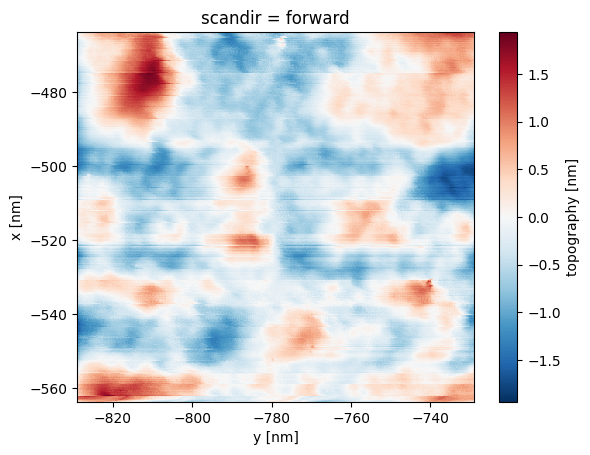

In [10]:
fwscan['topography'].plot()

Let's see the spectra Dataset

In [11]:
specmap.spectra

<xarray.Dataset>
Dimensions:      (bias: 501, specpos_x: 32, specpos_y: 32, repetitions: 1,
                  biasscandir: 2)
Coordinates:
  * bias         (bias) float64 0.5 0.498 0.496 0.494 ... -0.496 -0.498 -0.5
  * specpos_x    (specpos_x) float64 -465.3 -468.5 -471.6 ... -559.1 -562.2
  * specpos_y    (specpos_y) float64 -730.7 -733.8 -736.9 ... -824.4 -827.5
  * repetitions  (repetitions) int32 0
  * biasscandir  (biasscandir) <U5 'left' 'right'
Data variables:
    lia          (bias, specpos_x, specpos_y, repetitions, biasscandir) float64 ...
    current      (bias, specpos_x, specpos_y, repetitions, biasscandir) float64 ...
    x            (specpos_x, specpos_y) float64 -465.3 -468.5 ... -559.1 -562.2
    y            (specpos_x, specpos_y) float64 -730.7 -730.7 ... -827.5 -827.5
Attributes: (12/13)
    filename:           ./test/dI-dV_ABC_Graphite-Sample5_9K_2021_08_24_11_54...
    bias:               0.5
    bias units:         V
    setpoint:           100.0000013351432
    setpoint units:     pA
    measurement date:   08/23/21
    ...                 ...
    scan angle:         0.0
    LI amplitude:       40.0
    LI amplitude unit:  mV
    LI frequency:       1250.0
    LI frequency unit:  Hz
    LI phase:           -102.9999998

Plotting the $dI/dV$ spectra.

We can use the `sel` function for this, by specifying the coordinates in nm. Finally selecting the 'lia' data variable to plot as a function of the `bias` coordinate.
To do this we first select the one value in repetitions coordinate, because there are only two spectra (left and right bias scan) at each tip position.
We also can use the `isel` and `sel` functions together.

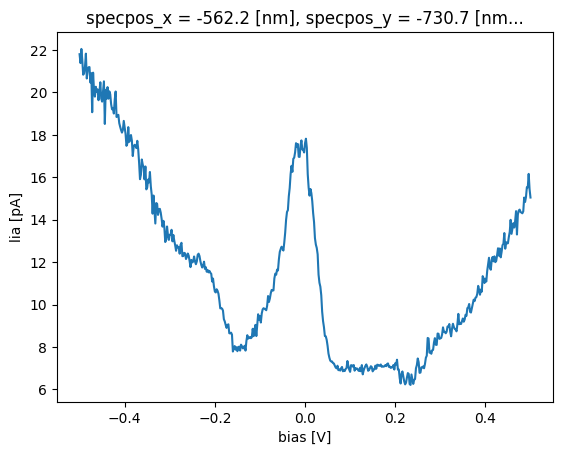

In [12]:
specmap2 = specmap.spectra.isel(repetitions=0)
specmap2.sel(biasscandir = 'left').sel(specpos_x=-782, specpos_y=-521, method='nearest')['lia'].plot()

Plot both the current and Lock-In

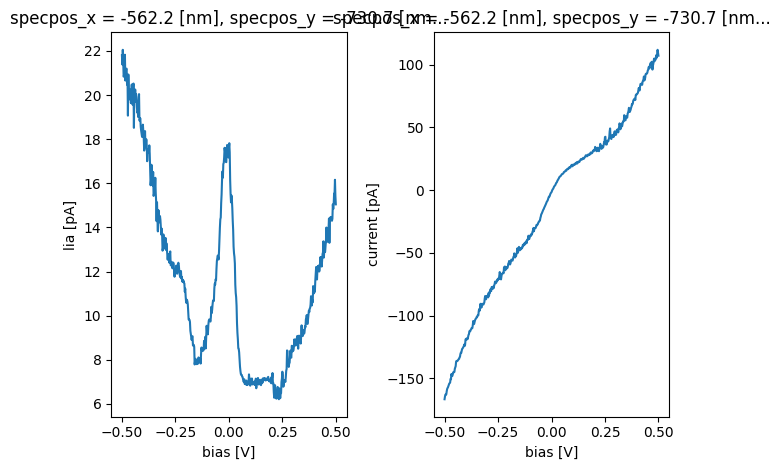

In [13]:
fig, (ax1, ax2) = pl.subplots(1, 2)
specmap2.isel(biasscandir=0).sel(specpos_x=-782, specpos_y=-521, method='nearest')['lia'].plot(ax=ax1)
specmap2.isel(biasscandir=0).sel(specpos_x=-782, specpos_y=-521, method='nearest')['current'].plot(ax=ax2)
pl.tight_layout()

Plot the $dI/dV$ value at zero bias.

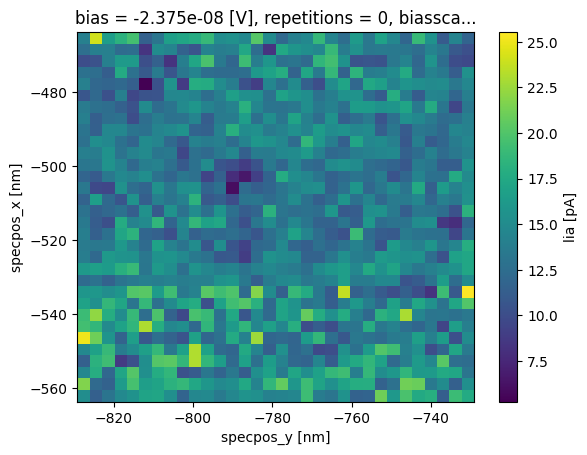

In [14]:
specmap.spectra.isel(repetitions=0, biasscandir=0).sel(bias=0, method='nearest')['lia'].plot()

Average over the forward and backward directions of the bias sweep

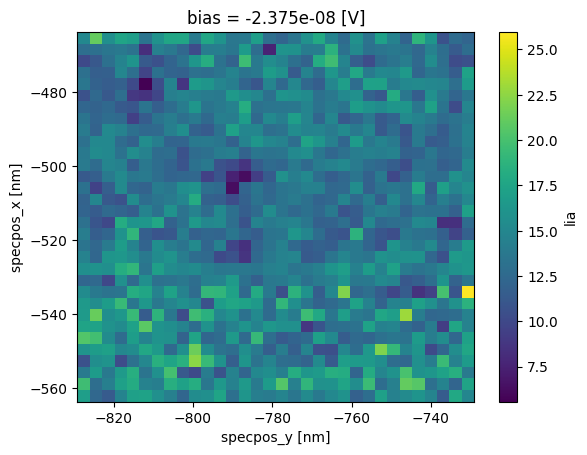

In [15]:
specmap.spectra.mean(dim=['repetitions', 'biasscandir']).sel(bias=0, method='nearest')['lia'].plot()

Let's do something more fancy, like plotting spectra across a line, parallel to the 'y' axis at 'x'=-542 nm

In [16]:
specmap_avg = specmap.spectra.mean(dim=['repetitions', 'biasscandir'])

In [17]:
spec_along_line = specmap_avg.sel(specpos_x=-542, method='nearest')

The selected data now has coordinates of `bias` and `specpos_y`. 

In [18]:
spec_along_line

<xarray.Dataset>
Dimensions:    (bias: 501, specpos_y: 32)
Coordinates:
  * bias       (bias) float64 0.5 0.498 0.496 0.494 ... -0.496 -0.498 -0.5
    specpos_x  float64 -543.5
  * specpos_y  (specpos_y) float64 -730.7 -733.8 -736.9 ... -821.3 -824.4 -827.5
Data variables:
    lia        (bias, specpos_y) float64 18.12 19.5 15.82 ... 17.33 16.82 15.61
    current    (bias, specpos_y) float64 122.6 130.2 95.7 ... -136.6 -129.6
    x          (specpos_y) float64 -465.3 -468.5 -471.6 ... -556.0 -559.1 -562.2
    y          (specpos_y) float64 -808.8 -808.8 -808.8 ... -808.8 -808.8 -808.8

We can plot this on a density plot.

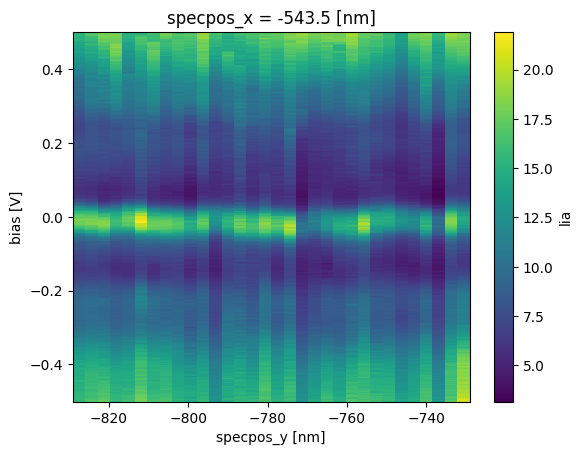

In [19]:
spec_along_line['lia'].plot()